In [1]:
from source.pyth.Model.controller import Controller
import os
import warnings


warnings.filterwarnings('ignore')

path_to_data = os.path.join(os.curdir, 'source/generated_data/thesis_simple_test1/train.csv')
path_to_config = os.path.join(os.curdir, 'source/generated_data/thesis_simple_test1/train.ini')
path_to_observation = os.path.join(os.curdir, 'source/generated_data/thesis_simple_test1/single1.csv')



In [2]:
c = Controller()

# 10-fold cross validation
f1_scores = c.kfold_cross_validation(path_to_data=path_to_data,
                         path_to_config=path_to_config,
                         csv_delimiter=',',
                         hidden_marker='diagnosis',
                         layers=['mobility', 'motoric', 'neuro'],
                         k = 10)



Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 509.35it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<00:00, 6000.43it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 857.20it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 666.66it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5770938396453857 seconds


100%|██████████| 30/30 [00:00<00:00, 789.12it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8022036474836346
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 508.47it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<?, ?it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 999.87it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 750.03it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5750000476837158 seconds


100%|██████████| 30/30 [00:00<00:00, 769.20it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8019132338760895
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 514.29it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<?, ?it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 750.05it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 750.05it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5699985027313232 seconds


100%|██████████| 30/30 [00:00<00:00, 769.25it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.7981395560682979
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 510.10it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<?, ?it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 857.32it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 500.14it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5813031196594238 seconds


100%|██████████| 30/30 [00:00<00:00, 697.68it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8247608790183693
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 506.57it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<?, ?it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 749.92it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 599.90it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5790121555328369 seconds


100%|██████████| 30/30 [00:00<00:00, 740.62it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.7872372763473088
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 496.98it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<00:00, 6003.30it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 857.06it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 750.19it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5892846584320068 seconds


100%|██████████| 30/30 [00:00<00:00, 769.22it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8207859404207422
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 511.36it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<00:00, 6003.30it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 857.23it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 749.96it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5710010528564453 seconds


100%|██████████| 30/30 [00:00<00:00, 769.21it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.7845193183093203
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 472.02it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<?, ?it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 857.03it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 666.93it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.6210100650787354 seconds


100%|██████████| 30/30 [00:00<00:00, 789.48it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.768625166791343
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 507.52it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<?, ?it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 1199.86it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 666.64it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5760014057159424 seconds


100%|██████████| 30/30 [00:00<00:00, 833.28it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8450482629602654
Extracting counts. This may take some time.


100%|██████████| 270/270 [00:00<00:00, 503.73it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<?, ?it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 750.32it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 666.68it/s]


Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.5800025463104248 seconds


100%|██████████| 30/30 [00:00<00:00, 810.75it/s]

The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.772418656651508
The mean score is 0.800565193792688 with a standart deviation of 0.022871237532286183.


In [3]:
# construct our model
c.construct(path_to_data=path_to_data,
            path_to_config=path_to_config,
            csv_delimiter=',')

"""
We are trying to make a sequence to sequence prediction. Solely from the sequences for markers
of the layers mobility, motoric and neuro, we will try to infer the sequence of hidden states for the marker 'diagnosis'.
"""

c.optimal_state_sequence(path_to_observation=path_to_observation,
                         csv_delimiter=',',
                         hidden_marker='diagnosis',
                         layers=['mobility', 'motoric', 'neuro'])

Extracting counts. This may take some time.


100%|██████████| 300/300 [00:00<00:00, 505.05it/s]


Calculating initial state probabilities.


100%|██████████| 6/6 [00:00<00:00, 6001.87it/s]


Calculating state transition probabilities.


100%|██████████| 6/6 [00:00<00:00, 1000.55it/s]


Calculating observation probabilities.


100%|██████████| 6/6 [00:00<00:00, 750.08it/s]

Extraction of probabilities successful. Elapsed time: 0.0 hours, 0.0 minutes and 0.6426398754119873 seconds


,id,date,mobility,motoric,neuro,diagnosis,Predicted state for diagnosis
0,0,2022-08-03,good,med-good,med-bad,good,good
1,0,2022-08-04,good,good,good,good,good
2,0,2022-08-09,med-good,med-good,bad,med-good,med-good
3,0,2022-08-11,med-good,med,med-bad,med-good,med-good
4,0,2022-08-12,good,med-good,med-good,med-good,med-good
5,0,2022-08-13,med,med-bad,med,med-good,med
6,0,2022-08-14,med-good,med,bad,med,med
7,0,2022-08-15,med,med,med-bad,med,med
8,0,2022-08-16,good,med-bad,med-bad,med,med
9,0,2022-08-22,med-bad,bad,med,med,med


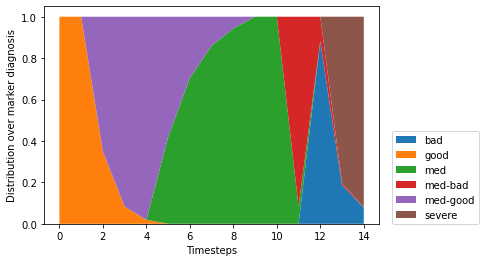

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.88074786, 0.18666136, 0.07786666],
       [1.        , 1.        , 0.34818218, 0.08330829, 0.01898931,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41900105, 0.7044731 , 0.85946989, 0.94362527, 1.        ,
        1.        , 0.08441659, 0.00211776, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.91558341, 0.11713438, 0.00857112, 0.00145809],
       [0.        , 0.        , 0.65181782, 0.91669171, 0.98101069,
        0.58099895, 0.2955269 , 0.14053011, 0.05637473, 0.        ,
        0.        , 0.        , 0.        , 

In [4]:
""" Now, let us try to plot the priors for the hiddens states. This time, we only use the layer motoric. """

c.plot_posterior_distribution(path_to_observation=path_to_observation,
                              csv_delimiter=',',
                              layers= ['motoric'],
                              hidden_marker='diagnosis')

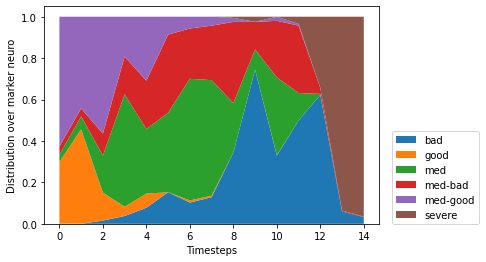

array([[1.71401767e-03, 0.00000000e+00, 1.54694946e-02, 3.77320810e-02,
        7.75951390e-02, 1.52559481e-01, 1.02559389e-01, 1.28549774e-01,
        3.43766309e-01, 7.43910627e-01, 3.29753499e-01, 4.98850121e-01,
        6.21867048e-01, 5.95807525e-02, 3.26113932e-02],
       [2.96388497e-01, 4.56032542e-01, 1.34673867e-01, 4.48528267e-02,
        6.81953795e-02, 0.00000000e+00, 1.03705514e-02, 7.07432746e-03,
        0.00000000e+00, 0.00000000e+00, 1.45920492e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.64028055e-02, 6.23450211e-02, 1.79432414e-01, 5.42435720e-01,
        3.11658418e-01, 3.83463214e-01, 5.87355880e-01, 5.58057141e-01,
        2.39056086e-01, 9.80446593e-02, 3.75530769e-01, 1.32720320e-01,
        5.41011621e-03, 0.00000000e+00, 0.00000000e+00],
       [3.86779655e-02, 3.90724869e-02, 1.05732228e-01, 1.82527936e-01,
        2.33791247e-01, 3.77504591e-01, 2.42862331e-01, 2.63083952e-01,
        3.92056077e-01, 1.33327055e-0

In [5]:
"""To continue our analysis, let us try to predict the posteriors for the hidden state neuro solely from the layer motoric"""
c.plot_posterior_distribution(path_to_observation=path_to_observation,
                              csv_delimiter=',',
                              layers= ['motoric'],
                              hidden_marker='neuro')

In [6]:
"""Similarily, let us try to predict the optimal state sequence for the hidden state neuro from the layers motoric and mobility"""

c.optimal_state_sequence(path_to_observation=path_to_observation,
                         csv_delimiter=',',
                         hidden_marker='neuro',
                         layers=['mobility', 'motoric'])

,id,date,mobility,motoric,neuro,diagnosis,Predicted state for neuro
0,0,2022-08-03,good,med-good,med-bad,good,med-good
1,0,2022-08-04,good,good,good,good,good
2,0,2022-08-09,med-good,med-good,bad,med-good,med-good
3,0,2022-08-11,med-good,med,med-bad,med-good,med
4,0,2022-08-12,good,med-good,med-good,med-good,med
5,0,2022-08-13,med,med-bad,med,med-good,bad
6,0,2022-08-14,med-good,med,bad,med,bad
7,0,2022-08-15,med,med,med-bad,med,bad
8,0,2022-08-16,good,med-bad,med-bad,med,bad
9,0,2022-08-22,med-bad,bad,med,med,bad
